In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [11]:
#用Jupyter notebook時，路徑直接設W11_clustering_RFM.csv
#用Colab時，路徑要改為/content/W11_clustering_RFM.csv

rfm = pd.read_csv('W11_clustering_RFM.csv')


In [12]:
type(rfm)

pandas.core.frame.DataFrame

In [13]:
rfm

,cid,gender,R,F,M
0,0S3670071489,F,586,1,1380
1,0S3687895473,M,12,1,1186
2,0S3690675977,F,75,2,2850
3,2009S2044237,F,657,1,1099
4,2009S2044261,M,145,1,1360
...,...,...,...,...,...
43667,S201S242852053,F,211,1,678
43668,S201S280812053,F,109,2,3120
43669,S201S280816053,M,313,1,780
43670,S201S280840053,M,33,1,150


In [14]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43672 entries, 0 to 43671
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cid     43672 non-null  object
 1   gender  43672 non-null  object
 2   R       43672 non-null  int64 
 3   F       43672 non-null  int64 
 4   M       43672 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.7+ MB


In [15]:
data = rfm.iloc[:,2:5]
print(data)

         R  F     M
0      586  1  1380
1       12  1  1186
2       75  2  2850
3      657  1  1099
4      145  1  1360
...    ... ..   ...
43667  211  1   678
43668  109  2  3120
43669  313  1   780
43670   33  1   150
43671   24  2  2590

[43672 rows x 3 columns]


In [16]:
df = rfm[['R','F','M']]
df.head()

,R,F,M
0,586,1,1380
1,12,1,1186
2,75,2,2850
3,657,1,1099
4,145,1,1360


In [17]:
rfm.describe()

,R,F,M
count,43672.000000,43672.000000,43672.000000
mean,312.230560,1.788835,2595.994298
std,197.701405,2.262211,4945.038093
min,1.000000,1.000000,29.000000
25%,141.000000,1.000000,870.000000
50%,296.000000,1.000000,1380.000000
75%,484.000000,2.000000,2580.000000
max,669.000000,112.000000,233136.000000


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
df_minmax = scaler.fit_transform(data.to_numpy())
df_minmax

array([[8.75748503e-01, 0.00000000e+00, 5.79562175e-03],
       [1.64670659e-02, 0.00000000e+00, 4.96338591e-03],
       [1.10778443e-01, 9.00900901e-03, 1.21017387e-02],
       ...,
       [4.67065868e-01, 0.00000000e+00, 3.22169647e-03],
       [4.79041916e-02, 0.00000000e+00, 5.19074931e-04],
       [3.44311377e-02, 9.00900901e-03, 1.09863711e-02]])

In [20]:
df_minmax = pd.DataFrame(df_minmax, columns=['R','F','M'])
df_minmax

,R,F,M
0,0.875749,0.000000,0.005796
1,0.016467,0.000000,0.004963
2,0.110778,0.009009,0.012102
3,0.982036,0.000000,0.004590
4,0.215569,0.000000,0.005710
...,...,...,...
43667,0.314371,0.000000,0.002784
43668,0.161677,0.009009,0.013260
43669,0.467066,0.000000,0.003222
43670,0.047904,0.000000,0.000519


In [21]:
model_KMC = KMeans(n_clusters=4, max_iter=500, random_state=42)
model_KMC.fit_predict(df_minmax)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 2, ..., 0, 2, 2])

In [22]:
r1 = pd.Series(model_KMC.labels_).value_counts()
r1

2    12062
0    11837
3    10187
1     9586
Name: count, dtype: int64

In [23]:
r2 = pd.DataFrame(model_KMC.cluster_centers_)
r2

,0,1,2
0,0.358468,0.006232,0.010220
1,0.877883,0.001400,0.006335
2,0.105587,0.015541,0.018300
3,0.630672,0.003496,0.007696


In [24]:
r21 = pd.concat([r1, r2], axis = 1)
r21

,count,0,1,2
2,12062,0.105587,0.015541,0.018300
0,11837,0.358468,0.006232,0.010220
3,10187,0.630672,0.003496,0.007696
1,9586,0.877883,0.001400,0.006335


In [25]:
r21.columns = list(df_minmax.columns) + ['size_of_Group']
r21

,R,F,M,size_of_Group
2,12062,0.105587,0.015541,0.018300
0,11837,0.358468,0.006232,0.010220
3,10187,0.630672,0.003496,0.007696
1,9586,0.877883,0.001400,0.006335


In [26]:
r = pd.concat([df_minmax, pd.Series(model_KMC.labels_, index = df_minmax.index)], axis = 1)
r

,R,F,M,0
0,0.875749,0.000000,0.005796,1
1,0.016467,0.000000,0.004963,2
2,0.110778,0.009009,0.012102,2
3,0.982036,0.000000,0.004590,1
4,0.215569,0.000000,0.005710,2
...,...,...,...,...
43667,0.314371,0.000000,0.002784,0
43668,0.161677,0.009009,0.013260,2
43669,0.467066,0.000000,0.003222,0
43670,0.047904,0.000000,0.000519,2


In [27]:
r.columns = list(df_minmax.columns) + ['GroupID']
r

,R,F,M,GroupID
0,0.875749,0.000000,0.005796,1
1,0.016467,0.000000,0.004963,2
2,0.110778,0.009009,0.012102,2
3,0.982036,0.000000,0.004590,1
4,0.215569,0.000000,0.005710,2
...,...,...,...,...
43667,0.314371,0.000000,0.002784,0
43668,0.161677,0.009009,0.013260,2
43669,0.467066,0.000000,0.003222,0
43670,0.047904,0.000000,0.000519,2


In [28]:
rfm["k-means"]=model_KMC.labels_
rfm

,cid,gender,R,F,M,k-means
0,0S3670071489,F,586,1,1380,1
1,0S3687895473,M,12,1,1186,2
2,0S3690675977,F,75,2,2850,2
3,2009S2044237,F,657,1,1099,1
4,2009S2044261,M,145,1,1360,2
...,...,...,...,...,...,...
43667,S201S242852053,F,211,1,678,0
43668,S201S280812053,F,109,2,3120,2
43669,S201S280816053,M,313,1,780,0
43670,S201S280840053,M,33,1,150,2


In [29]:
rfm.to_csv("rfm_KMC_Output.csv", index = False)

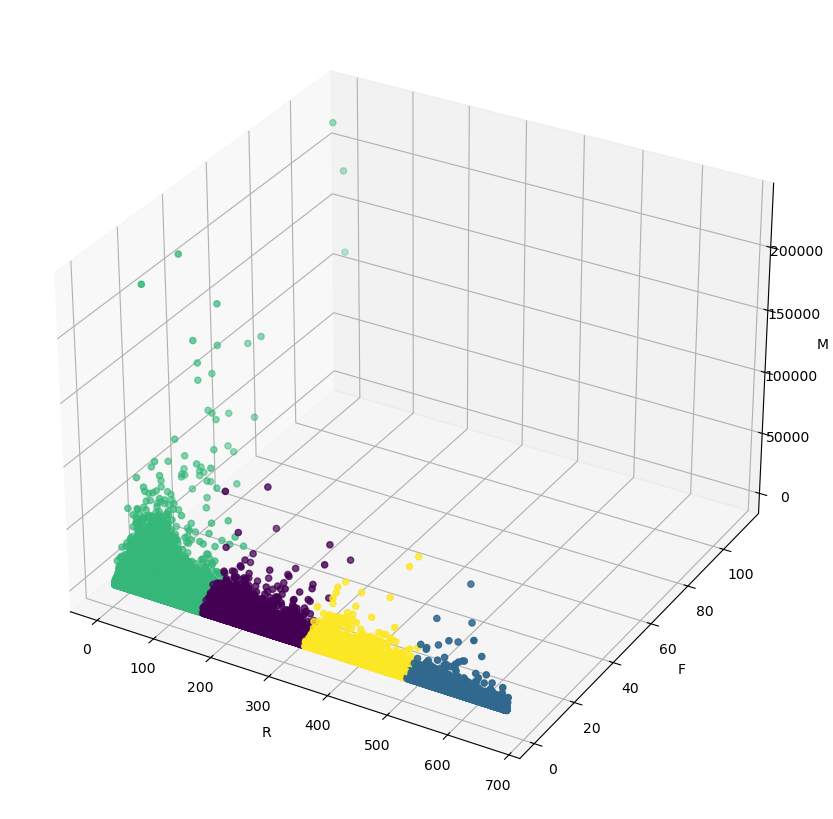

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

dft = pd.read_csv('rfm_KMC_Output.csv')
fig = plt.figure(figsize = (10,8))
#ax = fig.gca(projection='3d')
ax = fig.add_axes(Axes3D(fig))
ax.scatter(dft['R'], dft['F'], dft['M'], c=dft['k-means'], marker='o')
ax.set_xlabel('R')
ax.set_ylabel('F')
ax.set_zlabel('M')

plt.show()

In [31]:
SSE = []
for k in range(2, 11):
    est = KMeans(n_clusters = k)
    est.fit(df_minmax)
    SSE.append(est.inertia_)

SSE

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_k

[943.106355692078,
 464.7945157658073,
 258.9558600945905,
 180.00411615328937,
 135.068794509234,
 108.35384903844817,
 89.48352943893855,
 78.22025485890647,
 67.85400407868698]

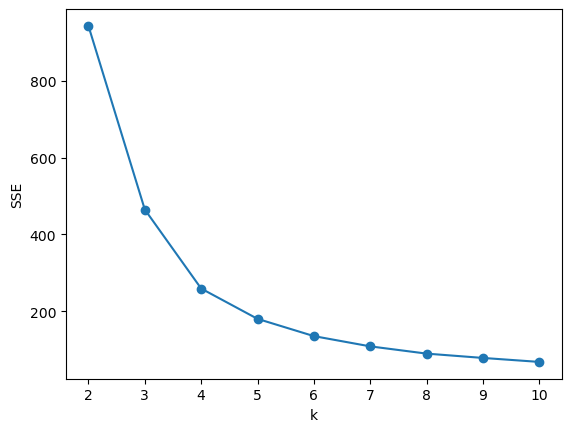

In [32]:
X = range(2,11)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')
plt.show()

In [33]:
group0 = r[r['GroupID']==0]
group1 = r[r['GroupID']==1]
group2 = r[r['GroupID']==2]
group3 = r[r['GroupID']==3]

In [34]:
group0.describe()
group1.describe()
group2.describe()
group3.describe()

,R,F,M,GroupID
count,10187.000000,10187.000000,10187.000000,10187.0
mean,0.630258,0.003491,0.007693,3.0
std,0.071988,0.009076,0.009380,0.0
min,0.495509,0.000000,0.000026,3.0
25%,0.573353,0.000000,0.003121,3.0
50%,0.627246,0.000000,0.005367,3.0
75%,0.691617,0.000000,0.008713,3.0
max,0.754491,0.252252,0.199449,3.0


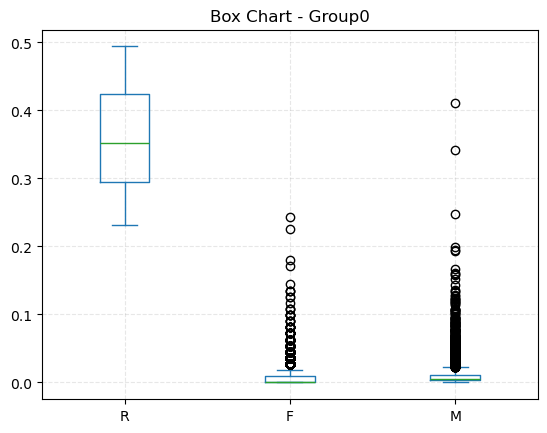

In [35]:
group0 = group0[['R','F','M']]
group0.plot.box(title = "Box Chart - Group0")
plt.grid(linestyle = '--', alpha = 0.3)

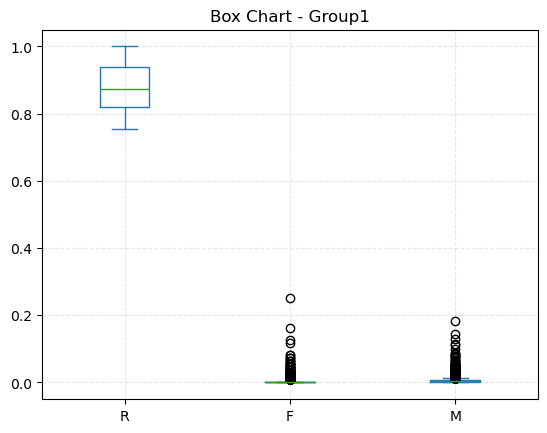

In [36]:
group1 = group1[['R','F','M']]
group1.plot.box(title = "Box Chart - Group1")
plt.grid(linestyle = '--', alpha = 0.3)

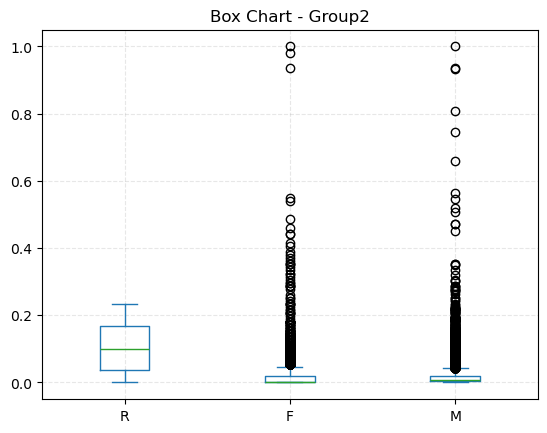

In [37]:
group2 = group2[['R','F','M']]
group2.plot.box(title = "Box Chart - Group2")
plt.grid(linestyle = '--', alpha = 0.3)

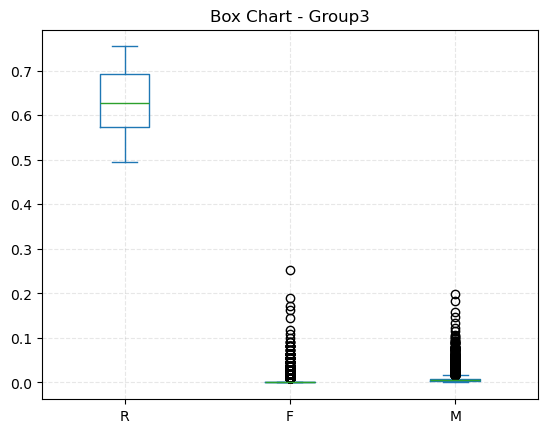

In [38]:
group3 = group3[['R','F','M']]
group3.plot.box(title = "Box Chart - Group3")
plt.grid(linestyle = '--', alpha = 0.3)

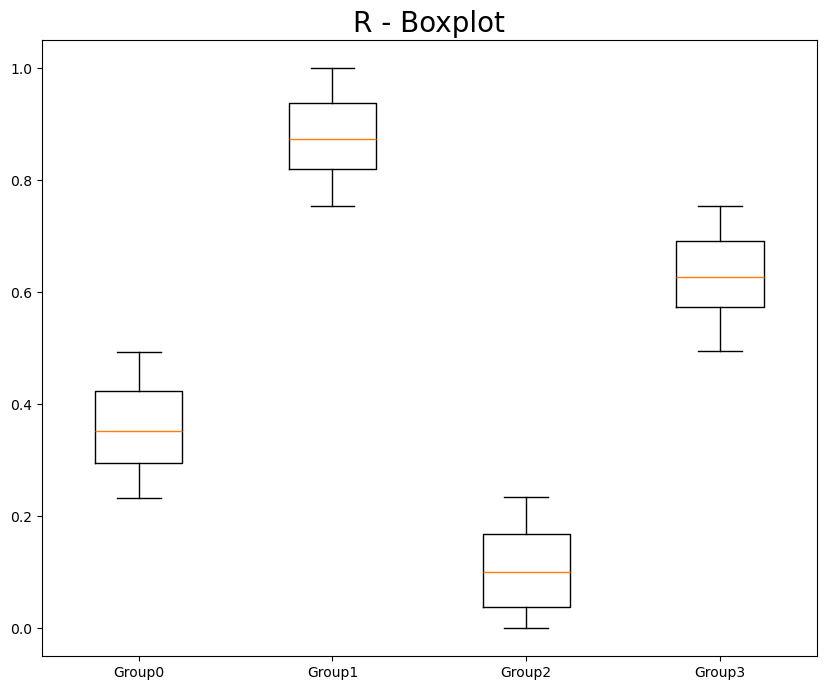

In [39]:
g0 = r[r['GroupID']==0]
g1 = r[r['GroupID']==1]
g2 = r[r['GroupID']==2]
g3 = r[r['GroupID']==3]

plt.figure(figsize = (10, 8))
labels = 'Group0', 'Group1', 'Group2', 'Group3'
plt.boxplot([g0['R'], g1['R'], g2['R'], g3['R']], labels = labels)
plt.title('R - Boxplot', fontsize = 20)

plt.show()

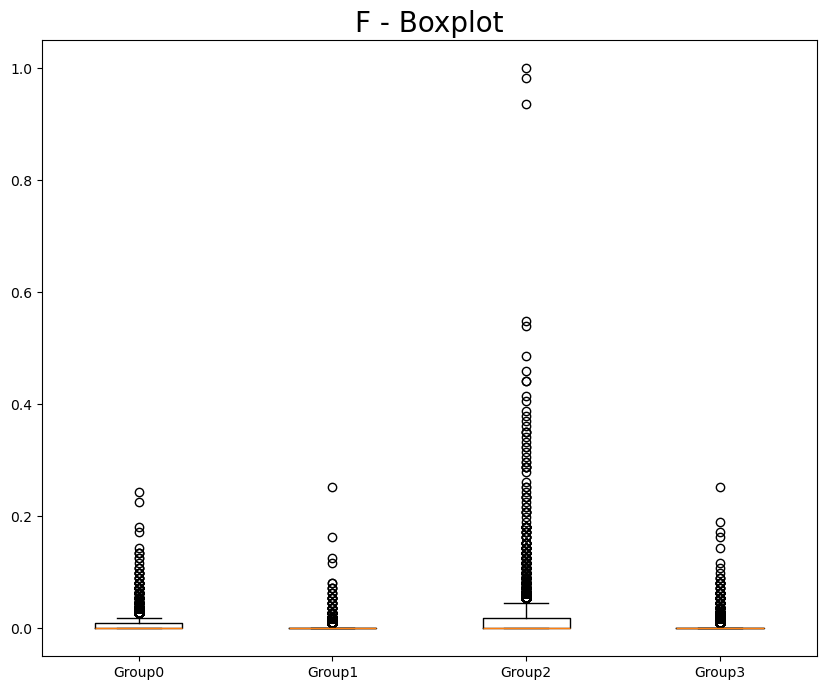

In [40]:
plt.figure(figsize = (10, 8))
labels = 'Group0', 'Group1', 'Group2', 'Group3'
plt.boxplot([g0['F'], g1['F'], g2['F'], g3['F']], labels = labels)
plt.title('F - Boxplot', fontsize = 20)

plt.show()

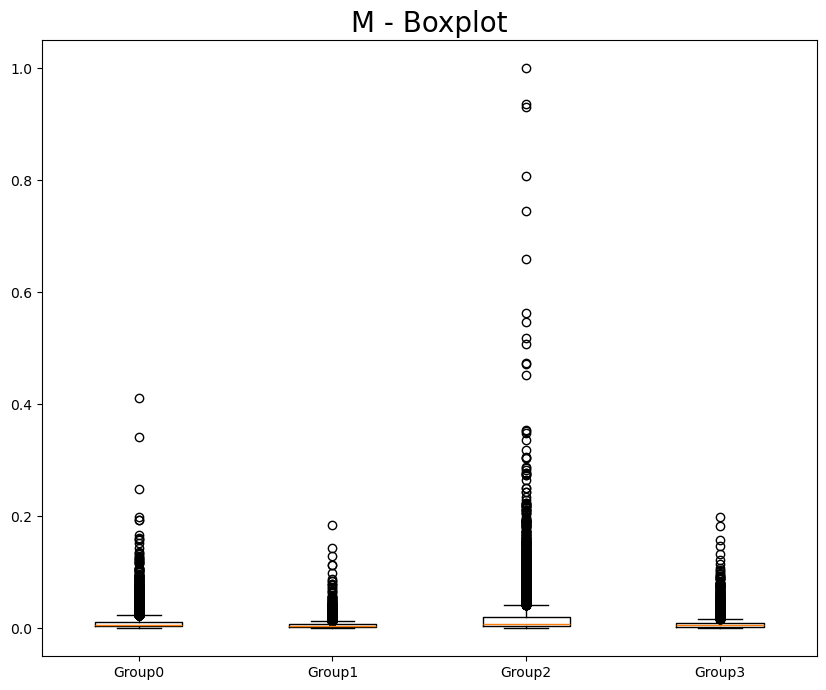

In [41]:
plt.figure(figsize = (10, 8))
labels = 'Group0', 'Group1', 'Group2', 'Group3'
plt.boxplot([g0['M'], g1['M'], g2['M'], g3['M']], labels = labels)
plt.title('M - Boxplot', fontsize = 20)

plt.show()